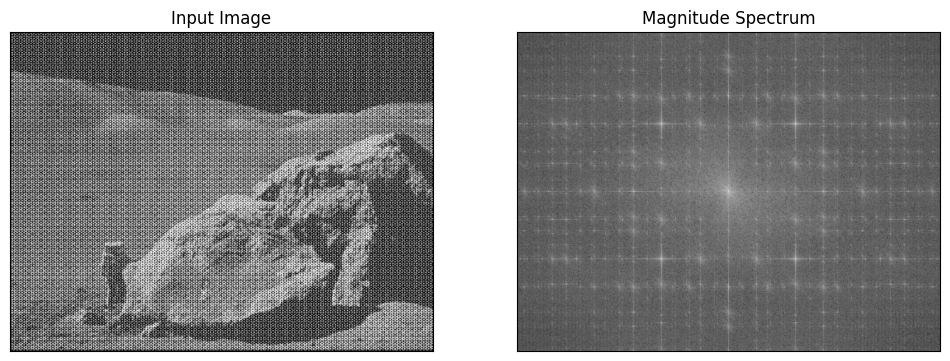

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1e-10)

plt.figure(figsize=(12, 10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

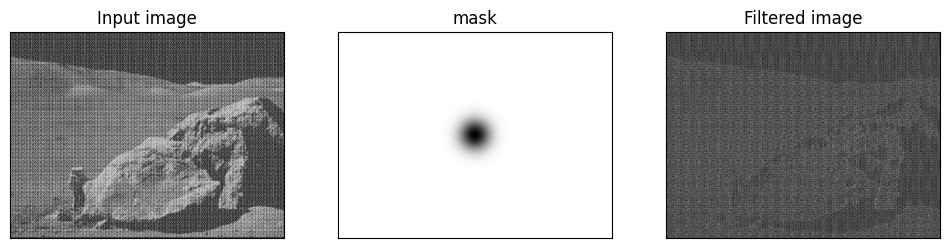

In [18]:
rows, cols = img.shape
centerX, centerY = (int(rows / 2), int(cols / 2))

mask = np.ones((rows, cols, 2), np.float32)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - centerX) ** 2 + (j - centerY) ** 2)
        mask[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (30 ** 2)))

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(12, 10))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(mask[:, :, 0], cmap='gray')
plt.title('mask'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])

plt.show()

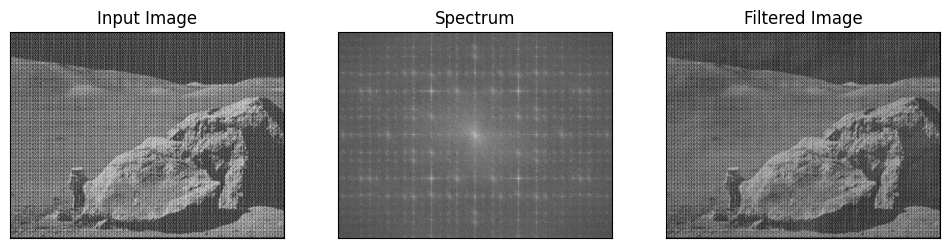

In [19]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1e-10)
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=250)

for i in local_max:
    r = np.int32(((i[0] - rows // 2) ** 2 + (i[1] - cols // 2) ** 2) ** (1 / 2))
    cv.circle(mask, (rows // 2, cols // 2), r, (0, 0))

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(12, 10))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()